In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv('prepared_data/apa_leslie_derti_apadb_data/apa_leslie_derti_apadb_data_df.csv', delimiter='\t')
df = df.query("site_type == 'UTR3' or site_type == 'Extension'").copy().reset_index(drop=True)
#df = df.loc[~df['wide_seq_ext'].str.slice(175 - 70, 175 - 70 + 205).str.contains("AAAAAAA|AAAGAAAA|AAACAAAA|AAAAGAAA|AAAACAAA")].copy().reset_index(drop=True)

print(df)


            gene_id        gene  sitenum  num_sites  pas  \
0          ABCB10.5      ABCB10        1          5    0   
1          ABCB10.4      ABCB10        2          5    0   
2          ABCB10.3      ABCB10        3          5    2   
3          ABCB10.2      ABCB10        4          5    1   
4          ABCB10.1      ABCB10        5          5    1   
5           ABCD3.3       ABCD3        3          5    1   
6           ABCD3.2       ABCD3        4          5    0   
7           ABCD3.1       ABCD3        5          5    0   
8            ABL2.7        ABL2        1          7    3   
9            ABL2.6        ABL2        2          7    2   
10           ABL2.5        ABL2        3          7    0   
11           ABL2.4        ABL2        4          7    2   
12           ABL2.3        ABL2        5          7    0   
13           ABL2.2        ABL2        6          7    0   
14           ABL2.1        ABL2        7          7    0   
15          ACADM.7       ACADM        2

In [3]:

#Make Valid PAS lookup hierarchy

cano_pas1 = 'AATAAA'
cano_pas2 = 'ATTAAA'

valid_pas = []

valid_pas.append({})
valid_pas[0]['AATAAA'] = True

valid_pas.append({})
valid_pas[1]['ATTAAA'] = True

valid_pas.append({})
valid_pas[2]['AGTAAA'] = True
valid_pas[2]['TATAAA'] = True
valid_pas[2]['CATAAA'] = True
valid_pas[2]['GATAAA'] = True

valid_pas.append({})
for pos in range(0, 6) :
    for base in ['A', 'C', 'G', 'T'] :
        valid_pas[3][cano_pas1[:pos] + base + cano_pas1[pos+1:]] = True

valid_pas.append({})
for pos1 in range(0, 6) :
    for pos2 in range(pos1 + 1, 6) :
        for base1 in ['A', 'C', 'G', 'T'] :
            for base2 in ['A', 'C', 'G', 'T'] :
                valid_pas[4][cano_pas1[:pos1] + base1 + cano_pas1[pos1+1:pos2] + base2 + cano_pas1[pos2+1:]] = True


In [4]:
#Global dataframe generation

gene_dict_pas_4 = {}
gene_dict_pas_3 = {}
gene_dict_pas_2 = {}
gene_dict_pas_1 = {}

for index, row in df.iterrows() :
    gene = row['gene']
    found_pas = row['pas']
    
    if gene not in gene_dict_pas_4 :
        gene_dict_pas_4[gene] = 0
    
    if gene not in gene_dict_pas_3 :
        gene_dict_pas_3[gene] = 0
    
    if gene not in gene_dict_pas_2 :
        gene_dict_pas_2[gene] = 0
    
    if gene not in gene_dict_pas_1 :
        gene_dict_pas_1[gene] = 0
    
    if found_pas != -1 and found_pas <= 4 :
        gene_dict_pas_4[gene] += 1
    if found_pas != -1 and found_pas <= 3 :
        gene_dict_pas_3[gene] += 1
    if found_pas != -1 and found_pas <= 2 :
        gene_dict_pas_2[gene] += 1
    if found_pas != -1 and found_pas <= 1 :
        gene_dict_pas_1[gene] += 1

prox_sitenum_pas_4 = []
prox_sitenum_pas_3 = []
prox_sitenum_pas_2 = []
prox_sitenum_pas_1 = []
num_sites_pas_4 = []
num_sites_pas_3 = []
num_sites_pas_2 = []
num_sites_pas_1 = []

gene_next_dict_pas_4 = {}
gene_next_dict_pas_3 = {}
gene_next_dict_pas_2 = {}
gene_next_dict_pas_1 = {}

for index, row in df.iterrows() :
    
    gene = row['gene']
    
    if gene not in gene_next_dict_pas_4 :
        gene_next_dict_pas_4[gene] = -1
    
    if gene not in gene_next_dict_pas_3 :
        gene_next_dict_pas_3[gene] = -1
    
    if gene not in gene_next_dict_pas_2 :
        gene_next_dict_pas_2[gene] = -1
    
    if gene not in gene_next_dict_pas_1 :
        gene_next_dict_pas_1[gene] = -1
    
    found_pas = row['pas']
    
    if found_pas != -1 and found_pas <= 4 :
        gene_next_dict_pas_4[gene] += 1
    if found_pas != -1 and found_pas <= 3 :
        gene_next_dict_pas_3[gene] += 1
    if found_pas != -1 and found_pas <= 2 :
        gene_next_dict_pas_2[gene] += 1
    if found_pas != -1 and found_pas <= 1 :
        gene_next_dict_pas_1[gene] += 1
    
    sitenum_pas_4 = -1
    if found_pas != -1 and found_pas <= 4 :
        sitenum_pas_4 = gene_next_dict_pas_4[gene]
    
    sitenum_pas_3 = -1
    if found_pas != -1 and found_pas <= 3 :
        sitenum_pas_3 = gene_next_dict_pas_3[gene]
    
    sitenum_pas_2 = -1
    if found_pas != -1 and found_pas <= 2 :
        sitenum_pas_2 = gene_next_dict_pas_2[gene]
    
    sitenum_pas_1 = -1
    if found_pas != -1 and found_pas <= 1 :
        sitenum_pas_1 = gene_next_dict_pas_1[gene]
    
    prox_sitenum_pas_4.append(sitenum_pas_4 + (1 if sitenum_pas_4 != -1 else 0))
    prox_sitenum_pas_3.append(sitenum_pas_3 + (1 if sitenum_pas_3 != -1 else 0))
    prox_sitenum_pas_2.append(sitenum_pas_2 + (1 if sitenum_pas_2 != -1 else 0))
    prox_sitenum_pas_1.append(sitenum_pas_1 + (1 if sitenum_pas_1 != -1 else 0))
    
    num_sites_pas_4.append(gene_dict_pas_4[gene])
    num_sites_pas_3.append(gene_dict_pas_3[gene])
    num_sites_pas_2.append(gene_dict_pas_2[gene])
    num_sites_pas_1.append(gene_dict_pas_1[gene])
    
df['sitenum_pas_4'] = prox_sitenum_pas_4
df['sitenum_pas_3'] = prox_sitenum_pas_3
df['sitenum_pas_2'] = prox_sitenum_pas_2
df['sitenum_pas_1'] = prox_sitenum_pas_1

df['num_sites_pas_4'] = num_sites_pas_4
df['num_sites_pas_3'] = num_sites_pas_3
df['num_sites_pas_2'] = num_sites_pas_2
df['num_sites_pas_1'] = num_sites_pas_1
'''
df = df[['gene',
        'gene_id',
        'sitenum',
        'num_sites',
        'sitenum_pas_4',
        'num_sites_pas_4',
        'sitenum_pas_3',
        'num_sites_pas_3',
        'sitenum_pas_2',
        'num_sites_pas_2',
        'sitenum_pas_1',
        'num_sites_pas_1',
        'pas',
        'seq',
        'pas_pos',
        'cut_mode',
        'chrom',
        'strand']]
'''
df = df.sort_values(by=['chrom', 'gene', 'sitenum']).copy().reset_index(drop=True)

print(df.head())
print(df.tail())

print('Total number of members: ' + str(len(df)))


    gene_id    gene  sitenum  num_sites  pas  \
0  ABCB10.5  ABCB10        1          5    0   
1  ABCB10.4  ABCB10        2          5    0   
2  ABCB10.3  ABCB10        3          5    2   
3  ABCB10.2  ABCB10        4          5    1   
4  ABCB10.1  ABCB10        5          5    1   

                                                 seq  \
0  GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...   
1  CTATTTCATGAAAAGCATGGAATATTATATTTTATTGTTCATAATT...   
2  CATAATTAATGAATAAAATTGATATGAATGAATATAGTGTTCTTTG...   
3  TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...   
4  TCAGGAATAAAGAAAAGACTAACATTACACATATCCAAAAACATGT...   

                                             seq_ext  \
0  TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...   
1  CATGAACTAAGCATTTATTAGTTCCCTGATTAGACTGGAAGAAGAA...   
2  AGAAGAAACCACTATTTCATGAAAAGCATGGAATATTATATTTTAT...   
3  TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...   
4  TATAAAACTTCTCACTACATTGTTTCTTAGTAGAATTTGGCTGTGG...   

                                     

In [5]:
df

,gene_id,gene,sitenum,num_sites,pas,seq,seq_ext,wide_seq,wide_seq_ext,count,...,derti_count_pooled,derti_total_count_pooled,sitenum_pas_4,sitenum_pas_3,sitenum_pas_2,sitenum_pas_1,num_sites_pas_4,num_sites_pas_3,num_sites_pas_2,num_sites_pas_1
0,ABCB10.5,ABCB10,1,5,0,GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...,TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...,TCAGGTTTTGTATTTTCTTTTCTTGTGGAATATTTTAATTAATATA...,GAGTTTTAATAATTGTAACTTTTTAAATGTCTATAGCACTGAAGTT...,10,...,24.0,69.0,1,1,1,1,5,5,5,4
1,ABCB10.4,ABCB10,2,5,0,CTATTTCATGAAAAGCATGGAATATTATATTTTATTGTTCATAATT...,CATGAACTAAGCATTTATTAGTTCCCTGATTAGACTGGAAGAAGAA...,AATGTAAATCAAATGGAAGTTTTCCCATGAACTAAGCATTTATTAG...,AAGTGCTTTTTCTCCATGGATGAGGCTAGACCCTAAGAAGTAATTA...,73,...,30.0,69.0,2,2,2,2,5,5,5,4
2,ABCB10.3,ABCB10,3,5,2,CATAATTAATGAATAAAATTGATATGAATGAATATAGTGTTCTTTG...,AGAAGAAACCACTATTTCATGAAAAGCATGGAATATTATATTTTAT...,TTATTAGTTCCCTGATTAGACTGGAAGAAGAAACCACTATTTCATG...,GTAATTAAGTCAATGTAAATCAAATGGAAGTTTTCCCATGAACTAA...,6,...,2.0,69.0,3,3,3,-1,5,5,5,4
3,ABCB10.2,ABCB10,4,5,1,TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...,TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...,GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...,TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...,467,...,10.0,69.0,4,4,4,3,5,5,5,4
4,ABCB10.1,ABCB10,5,5,1,TCAGGAATAAAGAAAAGACTAACATTACACATATCCAAAAACATGT...,TATAAAACTTCTCACTACATTGTTTCTTAGTAGAATTTGGCTGTGG...,ACCAAAGATGCAGTCTGTCATTTCTTATAAAACTTCTCACTACATT...,TAGTGAACTTTATCTGTGTCTGTCACTTTTTTTTTTTTTATGACCC...,8,...,3.0,69.0,5,5,5,4,5,5,5,4
5,ABCD3.3,ABCD3,3,5,1,AATTTTTACCACTTCTGTTTAGCGAACTTGTATACTTATTTTCTGT...,CTGGCTACCGAAGTAAACTGATGTACTGAATTCCATAATACATAAC...,TTTGCAGAATTAACTATAACAATCACTGGCTACCGAAGTAAACTGA...,TCAGAAAGGGGCATTTTGTACTCTTGTTTTTGCATAACTGGTTTTG...,252,...,64.0,154.0,1,1,1,1,3,3,3,3
6,ABCD3.2,ABCD3,4,5,0,GCCTTGACTTGAAAACATAGATAGTTTAATCTTGACTTGAAAAACA...,TGTTCTTTTTATTCTGGTATCTAAATACTGAGAAGTTCATTTATAA...,TCAGATATCCTATACAACCTTTGCTTGTTCTTTTTATTCTGGTATC...,CGAACTTGTATACTTATTTTCTGTTCAGATTAAAAAAAAAAAAAAA...,524,...,74.0,154.0,2,2,2,2,3,3,3,3
7,ABCD3.1,ABCD3,5,5,0,ATGAGAAAATAAGTATGAAACAGCAATGGTAGTTTGTTTTGCATTA...,TGCCAAGACATATCACCGTGTTCTCATAATAAGTTTTTACTTTTTA...,TTTCATCCATGAGCACCACGCTGCATGCCAAGACATATCACCGTGT...,GCAGTGGGAAATGGTAGTTTAATCCGAAGAATAAACCAAAGAATAA...,18,...,6.0,154.0,3,3,3,3,3,3,3,3
8,ABL2.7,ABL2,1,7,3,CTGAGGGGAGAGGGAAAAGGACTTGTTTTCCTGTGTTCTTGTTTTC...,TGTGGTGCAGAGGTAGCCACTGTTAGCCTGGTGGGAAAATGCACAC...,TGTCATGTGTACAGGAAATCAGTGATGTGGTGCAGAGGTAGCCACT...,TTCAGCAGCTGCTGGTGTGCCCGGGACAAACCCTGTCCTTAATAAC...,78,...,41.0,330.0,1,1,-1,-1,7,7,6,4
9,ABL2.6,ABL2,2,7,2,CCACAAGGCCATTGCTGCTGTAATAAGAACTGCAAATCAGAGTGCT...,CAAGAGAAATTTTTGTTCAGGGCTGTTGGAAGTAGCTGTTAGCCTT...,GCAGAAAAGAAAGCTGGGAATGTACCAAGAGAAATTTTTGTTCAGG...,GGTACTAATGGTGATTATGCTCCAATTTACCTAATGAATTTGGTGG...,17,...,8.0,330.0,2,2,1,-1,7,7,6,4


In [6]:

df.to_csv('leslie_derti_apadb_processed_utr3.csv', header=True, index=False, sep='\t')


In [6]:

df = pd.read_csv('leslie_derti_apadb_processed_utr3.csv', sep='\t')


n genes (total) = 8542


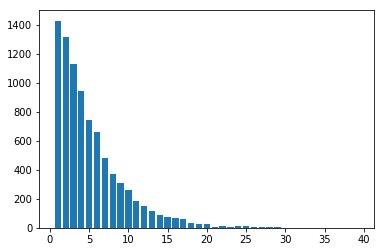

n genes (total) = 7549


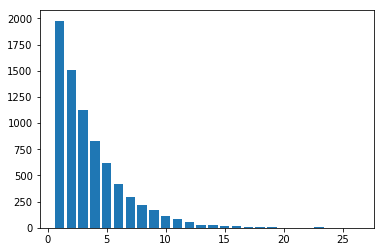

n genes (total) = 7172


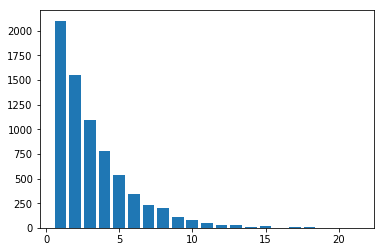

n genes (total) = 6528


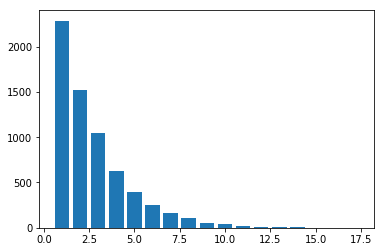

n genes (total) = 5722


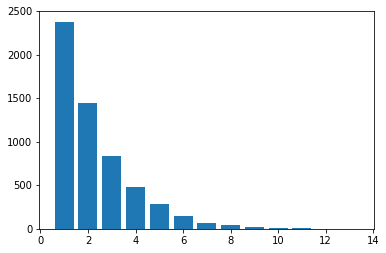

In [8]:
import matplotlib.pyplot as plt

import numpy as np

f = plt.figure()

t1 = df.query("num_sites >= 2").groupby("num_sites").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_4 >= 2").groupby("num_sites_pas_4").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_3 >= 2").groupby("num_sites_pas_3").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_2 >= 2").groupby("num_sites_pas_2").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_1 >= 2").groupby("num_sites_pas_1").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


In [11]:
min_pas_level = 2

max_num_sites = 10

df_sel = df.query("num_sites_pas_" + str(min_pas_level) + " >= 2 and num_sites_pas_" + str(min_pas_level) + " <= 10 and sitenum_pas_" + str(min_pas_level) + " != -1").copy().reset_index(drop=True)


In [12]:

len(df_sel)


23326

In [12]:

len(df_sel['gene'].unique())


6440

In [21]:

t = df_sel.groupby("num_sites_pas_2").agg({"gene" : "nunique"}).reset_index()


In [22]:
t

,num_sites_pas_2,gene
0,2,2285
1,3,1519
2,4,1041
3,5,630
4,6,395
5,7,253
6,8,161
7,9,104
8,10,52


In [27]:

tl = []
for _, row in t.iterrows() :
    for j in range(row['gene']) :
        tl.append(row['num_sites_pas_2'])

print(np.median(tl))
print(np.mean(tl))


3.0
3.6220496894409937


In [9]:
#Process features

def _one_hot_encode_inplace(seq, x, i, k) :
    for j in range(len(seq)) :
        if seq[j] == 'A' :
            x[i, k, j, 0] = 1.
        elif seq[j] == 'C' :
            x[i, k, j, 1] = 1.
        elif seq[j] == 'G' :
            x[i, k, j, 2] = 1.
        elif seq[j] == 'T' :
            x[i, k, j, 3] = 1.
    return
    
    
min_pas_level = 2

max_num_sites = 10

df_sel = df.query("num_sites_pas_" + str(min_pas_level) + " >= 2 and num_sites_pas_" + str(min_pas_level) + " <= 10 and sitenum_pas_" + str(min_pas_level) + " != -1").copy().reset_index(drop=True)

genes = df_sel['gene'].unique()
gene_dict = {gene : gene_i for gene_i, gene in enumerate(genes)}

cell_types = np.array(['apadb_count_kidney',
       'apadb_count_pancreas',
       'apadb_count_monocytes',
       'apadb_count_all',
       'apadb_count_pdac',
       'apadb_count_prcc',
       'apadb_count_full_blood',
       'apadb_count_hlf',
       'apadb_count_pooled',
       'leslie_count_hek293',
       'leslie_count_mcf10a_hras2',
       'leslie_count_mcf10a1',
       'leslie_count_mcf10a2',
       'leslie_count_mcf10a_hras1',
       'leslie_count_bcells1',
       'leslie_count_mcf7',
       'leslie_count_bcells2',
       'leslie_count_ovary',
       'leslie_count_breast',
       'leslie_count_brain',
       'leslie_count_skmuscle',
       'leslie_count_blcl',
       'leslie_count_hES',
       'leslie_count_testis',
       'leslie_count_hela',
       'leslie_count_ntera',
       'leslie_count_pooled',
       'leslie_count_apadb_region_hek293',
       'leslie_count_apadb_region_mcf10a_hras2',
       'leslie_count_apadb_region_mcf10a1',
       'leslie_count_apadb_region_mcf10a2',
       'leslie_count_apadb_region_mcf10a_hras1',
       'leslie_count_apadb_region_bcells1',
       'leslie_count_apadb_region_mcf7',
       'leslie_count_apadb_region_bcells2',
       'leslie_count_apadb_region_ovary',
       'leslie_count_apadb_region_breast',
       'leslie_count_apadb_region_brain',
       'leslie_count_apadb_region_skmuscle',
       'leslie_count_apadb_region_blcl',
       'leslie_count_apadb_region_hES',
       'leslie_count_apadb_region_testis',
       'leslie_count_apadb_region_hela',
       'leslie_count_apadb_region_ntera',
       'leslie_count_apadb_region_pooled',
       'derti_count_brain',
       'derti_count_kidney',
       'derti_count_liver',
       'derti_count_maqc-brain1',
       'derti_count_maqc-brain2',
       'derti_count_maqc-UHR1',
       'derti_count_maqc-UHR2',
       'derti_count_muscle',
       'derti_count_testis',
       'derti_count_pooled',
], dtype=np.object)

cell_type_dict = {cell_type : cell_type_i for cell_type_i, cell_type in enumerate(cell_types)}

x = np.zeros((genes.shape[0], max_num_sites, 205, 4))

m = np.zeros((genes.shape[0], max_num_sites))

l = np.zeros((genes.shape[0], max_num_sites))

prev_pos_dict = {}

c = np.zeros((genes.shape[0], max_num_sites, cell_types.shape[0]))

gene_df_dict = {}
gene_df_dict['gene'] = ['N/A'] * genes.shape[0]
gene_df_dict['strand'] = ['N/A'] * genes.shape[0]

gene_df_cols = ['gene', 'strand']

for k in range(max_num_sites) :
    
    gene_df_dict['gene_id' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['pas' + "_" + str(k)] = [-1] * genes.shape[0]
    gene_df_dict['wide_seq_ext' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['pas_exists' + "_" + str(k)] = [0] * genes.shape[0]
    gene_df_dict['dist' + "_" + str(k)] = [-1] * genes.shape[0]
    
    
    gene_df_dict['pas_pos' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['cut_start' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['cut_end' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    
    gene_df_cols.extend([
        'gene_id' + "_" + str(k),
        'pas' + "_" + str(k),
        'wide_seq_ext' + "_" + str(k),
        'pas_exists' + "_" + str(k),
        'dist' + "_" + str(k),
        
        'pas_pos' + "_" + str(k),
        'cut_start' + "_" + str(k),
        'cut_end' + "_" + str(k),
    ])

for index, row in df_sel.iterrows() :
    gene = row['gene']
    gene_id = row['gene_id']
    
    strand = row['strand']
    
    i = gene_dict[gene]
    k = row["sitenum_pas_" + str(min_pas_level)] - 1
    
    if i % 1000 == 0 and k == 0 :
        print("Processing gene " + str(i) + "...")
    
    seq = row['wide_seq_ext'][175-70:175-70+205]
    
    _one_hot_encode_inplace(seq, x, i, k)
    
    m[i, k] = 1.
    
    if gene not in prev_pos_dict :
        l[i, k] = 0.
    else :
        l[i, k] = np.abs(row['cut_mode'] - prev_pos_dict[gene])
    
    gene_df_dict['gene'][i] = gene
    gene_df_dict['strand'][i] = strand
    
    gene_df_dict['gene_id' + "_" + str(k)][i] = gene_id
    gene_df_dict['pas' + "_" + str(k)][i] = row['pas']
    gene_df_dict['wide_seq_ext' + "_" + str(k)][i] = row['wide_seq_ext']
    gene_df_dict['pas_exists' + "_" + str(k)][i] = int(m[i, k])
    gene_df_dict['dist' + "_" + str(k)][i] = l[i, k]
    
    gene_df_dict['pas_pos' + "_" + str(k)][i] = row['pas_pos']
    gene_df_dict['cut_start' + "_" + str(k)][i] = row['cut_start']
    gene_df_dict['cut_end' + "_" + str(k)][i] = row['cut_end']
    
    prev_pos_dict[gene] = row['cut_mode']
    
    for cell_type_i in range(cell_types.shape[0]) :
        cell_type = cell_types[cell_type_i]
        
        c[i, k, cell_type_i] = row[cell_type]

gene_df = pd.DataFrame(gene_df_dict)
gene_df = gene_df[gene_df_cols]

print(len(gene_df))
print("x.shape = " + str(x.shape))
print("m.shape = " + str(m.shape))
print("l.shape = " + str(l.shape))
print("c.shape = " + str(c.shape))


Processing gene 0...
Processing gene 1000...
Processing gene 2000...
Processing gene 3000...
Processing gene 4000...
Processing gene 5000...
Processing gene 6000...
6440
x.shape = (6440, 10, 205, 4)
m.shape = (6440, 10)
l.shape = (6440, 10)
c.shape = (6440, 10, 55)


In [10]:

total_c = np.sum(c, axis=(1, 2))

x = x[total_c > 0, ...]
m = m[total_c > 0, :]
l = l[total_c > 0, :]
c = c[total_c > 0, ...]
gene_df = gene_df.iloc[np.nonzero(total_c > 0)[0]].copy().reset_index(drop=True)

print(len(gene_df))
print("x.shape = " + str(x.shape))
print("m.shape = " + str(m.shape))
print("l.shape = " + str(l.shape))
print("c.shape = " + str(c.shape))


6440
x.shape = (6440, 10, 205, 4)
m.shape = (6440, 10)
l.shape = (6440, 10)
c.shape = (6440, 10, 55)


In [11]:

y = c / np.sum(c, axis=1, keepdims=True)
y[np.isnan(y)] = 0.

s = np.array(np.sum(c, axis=1) > 0, dtype=np.float)


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [12]:

gene_df.to_csv("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3.csv", sep='\t')


In [13]:

np.savez("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3.npz", x=x, m=m, l=l, c=c, y=y, s=s)

np.savez("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3_no_x.npz", m=m, l=l, c=c, y=y, s=s)


In [14]:

save_dict = np.load("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3.npz")
x, m, l, c, y, s = save_dict['x'], save_dict['m'], save_dict['l'], save_dict['c'], save_dict['y'], save_dict['s']


In [15]:
l

array([[   0.,  947.,   51., ...,    0.,    0.,    0.],
       [   0.,  136.,  688., ...,    0.,    0.,    0.],
       [   0., 6721.,  657., ...,    0.,    0.,    0.],
       ...,
       [   0.,  524.,    0., ...,    0.,    0.,    0.],
       [   0.,  186., 1553., ...,    0.,    0.,    0.],
       [   0.,  139.,    0., ...,    0.,    0.,    0.]])

In [16]:
np.log(np.cumsum(l, axis=1) * m + 1.)

array([[0.        , 6.8543545 , 6.90675478, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.91998093, 6.71538339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 8.81314101, 8.90639341, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 6.26339826, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.23110862, 7.46164039, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.94164242, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
#Re-load dataframe and construct Saluki halflife score matrix

min_pas_level = 3

gene_df = pd.read_csv("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3.csv", sep='\t')

saluki_df = pd.read_csv("apadb_processed_v2_utr3_isoforms_saluki_pred_pmirGLO_construct.csv", sep='\t')

saluki_dict = {}
for f in range(10) :
    for c in range(5) :
        for _, row in saluki_df.iterrows() :
            saluki_dict[row['gene_id'] + "_f" + str(f) + "_c" + str(c)] = row['isoform_hl_f' + str(f) + '_c' + str(c)]


In [8]:

max_num_sites = 10

hl = np.zeros((len(gene_df), max_num_sites, 50))
hl_m = np.zeros((len(gene_df), max_num_sites))

k = 0
for f in range(10) :
    for c in range(5) :
        i = 0
        for _, row in gene_df.iterrows() :

            for j in range(max_num_sites) :

                if row['pas_exists_' + str(j)] == 1 and row['gene_id_' + str(j)] + "_f" + str(f) + "_c" + str(c) in saluki_dict :
                    hl[i, j, k] = saluki_dict[row['gene_id_' + str(j)] + "_f" + str(f) + "_c" + str(c)]
                    hl_m[i, j] = 1.

            i += 1
        
        k += 1


In [9]:

np.savez("leslie_derti_apadb_features_pas_" + str(min_pas_level) + "_utr3_saluki_pmirGLO_construct.npz", hl=hl, hl_m=hl_m)
